# Twitter Sentiment Analysis using Python:
This is a program that fetches tweets from Twitter for the purpose of Sentiment Analysis.

---
---

### Importing the Libraries

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re
from matplotlib.pyplot import xlabel, ylabel

---

### Twitter API Credentials

In [2]:
log = pd.read_csv("auth1.csv")

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

---

### Authentication

In [3]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

---

### Creating the API & Creating a Dataframe of Tweets

In [4]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

---

### Defining General Functions

Cleaning the Tweets

In [5]:
def cleanTweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # Removing the @mentions
    tweet = re.sub(r'#', '', tweet) # Removing the # symbols
    tweet = re.sub(r'RT[\s]+', '', tweet) # Removing RT i.e. ReTweets
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) # Removing Hyperlinks
    return tweet

Getting Subjectivity and Polarity for Tweets and Assigning them to the Dataframe

In [6]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

Computing and Performing a Postive, Neutral and Negetive Analysis for the Tweets

In [7]:
def getAnalysis(score):
    if score<0:
        return 'Negetive'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

---

### Code for Stock Analysis

Get the Top 10 Gaining and Losing Stocks from the <a href="https://www.bseindia.com/markets.html">BSE India</a> Website

In [8]:
stocks = ['GOOGLE','ADANIGREEN','TCS','PAYTM','MINDTREE','ZOMATO','HCLTECH','YESBANK','DRREDDY','TRIDENT']

<AxesSubplot: xlabel='Stocks', ylabel='Number of Tweets'>

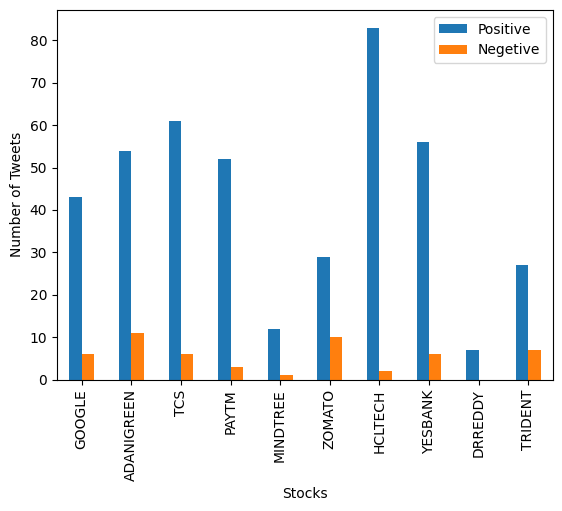

In [9]:
positive = []
negetive = []
for stock in stocks:
    posts = api.user_timeline(screen_name=stock, count=100, tweet_mode="extended")
    df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])
    
    df['Tweets'] = df['Tweets'].apply(cleanTweet)
    df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
    df['Polarity'] = df['Tweets'].apply(getPolarity)
    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    positive.append(len(df.loc[df['Analysis'] == 'Positive']))
    negetive.append(len(df.loc[df['Analysis'] == 'Negetive']))

ndf = pd.DataFrame({'Stocks': stocks, 'Positive': positive, 'Negetive': negetive})
ndf.plot(x="Stocks", y=["Positive", "Negetive"], kind="bar", xlabel='Stocks', ylabel='Number of Tweets')